### Homework Assignment 6 - 100 points

#### For this homework set, there are specific data cleaning techniques that are done for you. Once the pre-processing is done, you will be asked to perfrom PCA and clustering on the data set. You will use the wine.csv file (posted on Canvas)

* You are to work by yourself in this assignment and turn in YOUR own work. This assignment will be submitted only as either a PDF or an HTML file in addition to your jupyter notebook file.

* This assignment is due on **Dec 2nd at 11:59 PM** no later and must be submitted in **CANVAS.**

* This assignment will be scanned for plagiarism

In [185]:
# Importing the following Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [186]:
# Load the homework data set

# Rename the columns based on their features.

columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'dilution_of_wines', 'proline']

df = pd.read_csv('wine.csv', names=columns, header=0)
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,dilution_of_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Part 1: EDA & Data Pre-processing

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  dilution_of_wines     178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [189]:
# Check for null values
df.isna().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
dilution_of_wines       0
proline                 0
dtype: int64

In [190]:
# Check for predefined number of clusters
df['class'].nunique()

3

In [191]:
# Distribution of Data into clusters
df['class'].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

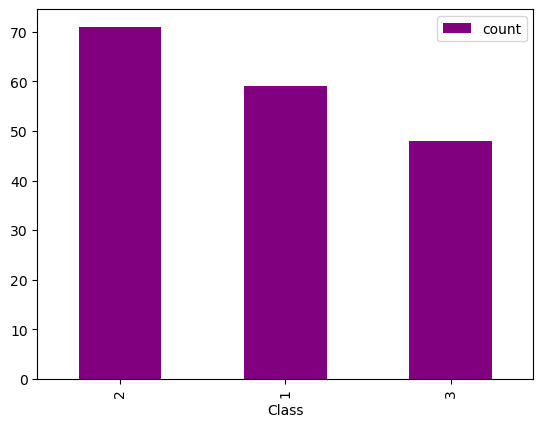

In [192]:
# Class Plots
df["class"].value_counts().plot.bar(color='Purple')
plt.xlabel("Class")
plt.legend()

In [193]:
# Utilizing the standard scaler method to get the values converted into integers.
X = df.iloc[:, 1:].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normal = scaler.fit_transform(X)

In [194]:
# check the dimensions

X_normal.shape  # 178 rows and 13 columns


(178, 13)

In [195]:
# Let's look at the array

X_normal


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## (70 points) Part 2 - Implementation of PCA

### Question 1- Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result of the clustering  (5 Points)

In [198]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_normal)
X_pca[:5]


array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01,  2.23880128e-01,
         5.96426546e-01, -6.51390947e-02, -6.41442706e-01,
         1.02095585e+00, -4.51563395e-01,  5.40810414e-01,
        -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01,  9.27120244e-01,
         5.37756128e-02, -1.02441595e+00,  3.08846753e-01,
         1.59701372e-01, -1.42657306e-01,  3.88237741e-01,
         3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01, -5.49276047e-01,
         4.24205451e-01,  3.44216131e-01,  1.17783447e+00,
         1.13360857e-01, -2.86672847e-01,  5.83573183e-04,
         2.17165104e-02],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01, -1.14431000e-01,
        -3.83337297e-01, -6.43593498e-01, -5.25444215e-02,
         2.39412605e-01,  7.59584312e

### Question 2 - Create a dataframe featuring the Principal components that you acquired through PCA and show the output (5 Points)

In [200]:
pc_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pc_columns)
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364


### Question 3 - Compute the amount of variance that each PCA explains. Dispay the output  (10 Points)


In [202]:
pca_variance = pca.explained_variance_ratio_
pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca_variance))],
    'PCA Explained Variance Ratio': pca_variance
})
pca_variance_df

,Principal Component,PCA Explained Variance Ratio
0,PC1,0.361988
1,PC2,0.192075
2,PC3,0.111236
3,PC4,0.070690
4,PC5,0.065633
5,PC6,0.049358
6,PC7,0.042387
7,PC8,0.026807
8,PC9,0.022222
9,PC10,0.019300


### Question 4 - Calculate the cummulative variances to 4 decimals places. Display the output (10 points)

In [204]:
import numpy as np
cum_var = np.cumsum(pca.explained_variance_ratio_)

cum_var_rounded = np.round(cum_var, 4)
cum_var_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(cum_var_rounded))],
    'Cumulative Variance': cum_var_rounded
})
cum_var_df


,Principal Component,Cumulative Variance
0,PC1,0.3620
1,PC2,0.5541
2,PC3,0.6653
3,PC4,0.7360
4,PC5,0.8016
5,PC6,0.8510
6,PC7,0.8934
7,PC8,0.9202
8,PC9,0.9424
9,PC10,0.9617


### Question 5 - Compute the Variance plot for PCA components obtained  and comment on the plot (10 points)


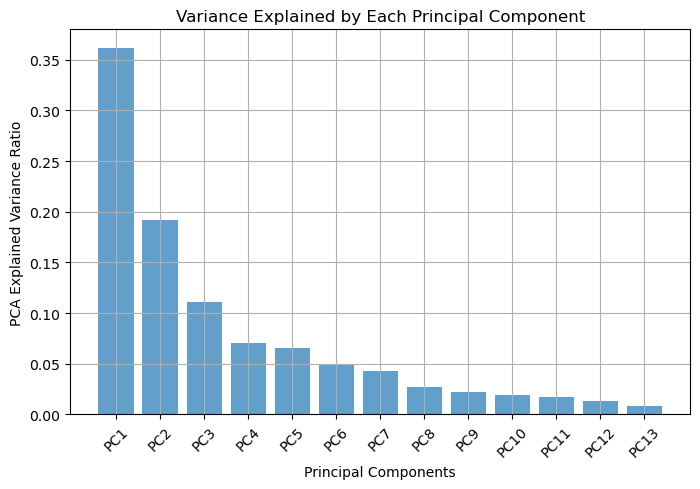

In [206]:
plt.figure(figsize=(8, 5))
plt.bar(pca_variance_df['Principal Component'], pca_variance_df['PCA Explained Variance Ratio'], alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('PCA Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Out of the 13 Principal components, the Pricipal Components 1,2 and 3 together contribute ~66% percent of the Variance. All other principal components contribute less than 10% variance. The three principal components will have the maximum impact in deciding the value of the target_variable. So we will proceed with 3 principal components for the further computation.

### Question 6 - As our results are suggesting to use first 3 principal components for further computation, extract the three features from  the PCA_dataset into PCA1, PCA2, PCA3 (10 points)

In [209]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_normal)
X_pca
df1 = pd.DataFrame(X_pca, columns=['PCA1','PCA2','PCA3'])
df1.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,dilution_of_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Question 7 - Create a dataframe for further clusering algorithms with PCA1, PCA2 and PCA3 as column headings. Display your results (10 points)

In [211]:
final_df = df1
final_df

,PCA1,PCA2,PCA3
0,3.316751,1.443463,-0.165739
1,2.209465,-0.333393,-2.026457
2,2.516740,1.031151,0.982819
3,3.757066,2.756372,-0.176192
4,1.008908,0.869831,2.026688
...,...,...,...
173,-3.370524,2.216289,-0.342570
174,-2.601956,1.757229,0.207581
175,-2.677839,2.760899,-0.940942
176,-2.387017,2.297347,-0.550696


### Question 8 - As done in class, go ahead and visualiz nthe results of the 3D PCA. Properly label the x, y, and z- axis. Comment and summarize your results after the plot. (20 points)

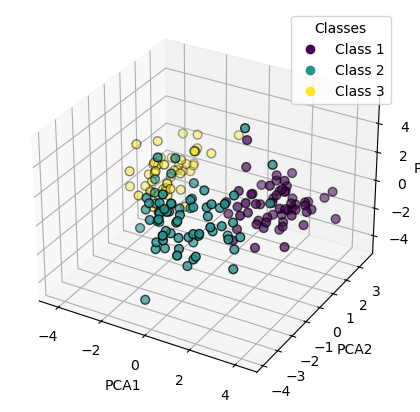

In [237]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y = df['class'].values

fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    final_df['PCA1'], final_df['PCA2'], final_df['PCA3'], 
    c=y, cmap='viridis', edgecolor='k', s=40
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

legend_labels = ['Class 1', 'Class 2', 'Class 3']
legend_handles, _ = scatter.legend_elements()
ax.legend(legend_handles, legend_labels, loc="upper right", title="Classes")

plt.show()


- This 3 dimensional PCA plot explains that the wine data visualized in a reduced dimensional space and the three different classes are formed to 3 seperate clusters.
- Here, the PCA captured the three Principal components which will have the maximum contribution in determining the value of the target variable, those 3 components will be having the maximum part of variances.
- So on the whole, after applying PCA the dimensions of the dataset is reduced, it is useful for faster training and inference.

## Part 3 (30 points). New Dataset

Repeat Step 1 and Step 2 with new Data. Please locate a dataset that has more than 50 numerical attributes and then reduce its dimensions while retaining 95% of its information using the PCA methon

Data : Handwritten Digits Dataset from Sklearn.datasets

In [260]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [246]:
digits = load_digits()

In [248]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [252]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [254]:
df['target'] = digits.target

In [256]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [258]:
X = df.drop('target',axis=1)
y = df.target

#### Step1 : EDA and Data Pre-Processing

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [267]:
#Checking for the Null values
df.isna().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [271]:
# Check for predefined number of clusters
df['target'].nunique()

10

In [273]:
df['target'].value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

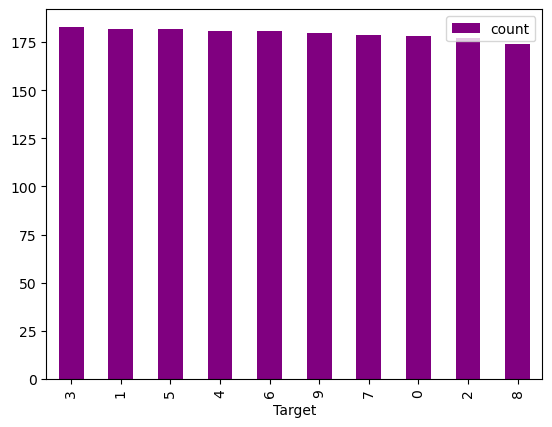

In [275]:
df["target"].value_counts().plot.bar(color='Purple')
plt.xlabel("Target")
plt.legend()

In [277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [287]:
X_scaled[:5]

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.

In [285]:
X_scaled.shape

(1797, 64)

#### Step 2 - Implementation of PCA

In [290]:
from sklearn.decomposition import PCA

pca = PCA(0.95) #Retaining 95% of the Information
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 , -0.32193146],
       [-0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843,  0.48914299],
       [-1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 , -0.54583387],
       ...,
       [-1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798, -1.20886377],
       [-1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483,  0.44339963],
       [ 1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104, -1.32137195]])

In [293]:
pc_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pc_columns)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-1.914214,-0.954502,-3.946035,-2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.534683,0.017979,-0.047950,-0.019124,-0.117190,-0.709049,-0.082410,0.814059,0.024931,-0.321931
1,-0.588980,0.924636,3.924755,1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,1.098196,1.144159,-0.037744,-0.371680,0.671299,0.004144,0.246765,0.200261,0.087108,0.489143
2,-1.302039,-0.317189,3.023333,2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,-0.749792,-0.487304,1.356959,0.107016,-0.149503,0.089290,-0.408216,-0.214596,-1.278875,-0.545834
3,3.020770,-0.868772,-0.801744,2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,0.268599,-0.875580,-0.117581,0.470575,0.148854,-0.234044,-0.396726,0.197436,0.772751,0.050325
4,-4.528949,-1.093480,0.973121,1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-0.660454,0.360253,-0.268121,-0.499444,0.263106,0.583008,0.174328,-0.215579,-0.133426,-0.184994


In [295]:
pca_variance = pca.explained_variance_ratio_
pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca_variance))],
    'PCA Explained Variance Ratio': pca_variance
})
pca_variance_df

,Principal Component,PCA Explained Variance Ratio
0,PC1,0.120339
1,PC2,0.095611
2,PC3,0.084444
3,PC4,0.064984
4,PC5,0.048602
5,PC6,0.042141
6,PC7,0.039421
7,PC8,0.033894
8,PC9,0.029982
9,PC10,0.029320


In [299]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

cum_var_rounded = np.round(cum_var, 4)
cum_var_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(cum_var_rounded))],
    'Cumulative Variance': cum_var_rounded
})
cum_var_df

,Principal Component,Cumulative Variance
0,PC1,0.1203
1,PC2,0.2159
2,PC3,0.3004
3,PC4,0.3654
4,PC5,0.4140
5,PC6,0.4561
6,PC7,0.4955
7,PC8,0.5294
8,PC9,0.5594
9,PC10,0.5887


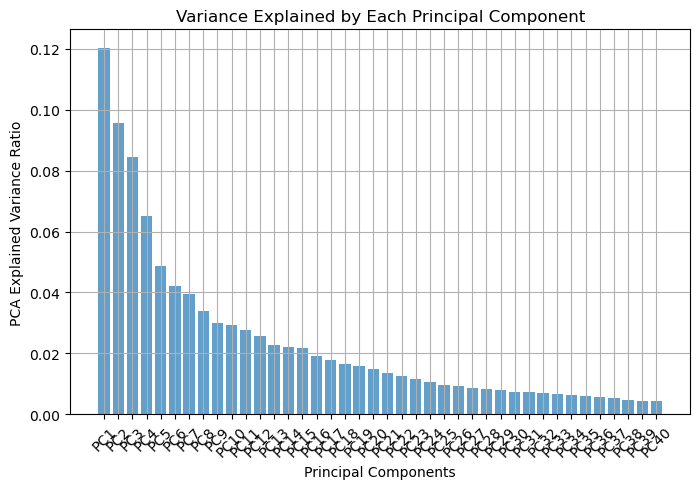

In [301]:
plt.figure(figsize=(8, 5))
plt.bar(pca_variance_df['Principal Component'], pca_variance_df['PCA Explained Variance Ratio'], alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('PCA Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [339]:
from sklearn.decomposition import PCA
 # Here we are keeping only the top-3 most contributed principal components to visualize in a 3D scatter plot
pca = PCA(n_components=3) 
X_pca = pca.fit_transform(X_scaled)

df1 = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(X_pca.shape[1])])

df1.head()


,PCA1,PCA2,PCA3
0,-1.914214,-0.954502,-3.946035
1,-0.588980,0.924636,3.924755
2,-1.302039,-0.317189,3.023333
3,3.020770,-0.868772,-0.801744
4,-4.528949,-1.093480,0.973121


In [329]:
final_df = df1
final_df

,PCA1,PCA2,PCA3
0,-1.914214,-0.954502,-3.946035
1,-0.588980,0.924636,3.924755
2,-1.302039,-0.317189,3.023333
3,3.020770,-0.868772,-0.801744
4,-4.528949,-1.093480,0.973121
...,...,...,...
1792,-0.104331,0.255024,-3.765861
1793,-2.423234,-1.429611,-3.045245
1794,-1.022596,-0.147911,2.469974
1795,-1.076055,-0.380906,-2.455487


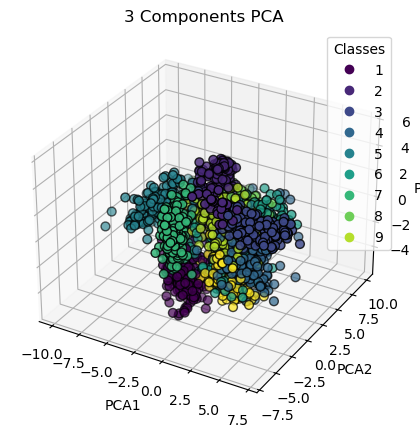

In [342]:
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    final_df['PCA1'], final_df['PCA2'], final_df['PCA3'], 
    c=y, cmap='viridis', edgecolor='k', s=40
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

legend_labels = ['1','2','3','4','5','6','7','8','9']
legend_handles, _ = scatter.legend_elements()
ax.legend(legend_handles, legend_labels, loc="upper right", title="Classes")

plt.title('3 Components PCA')
plt.show()



- The target column will be assigned to y, and the inputs will be the 'final_df' dataframe.
-  Here in this dataset after applying PCA, while retaining 95% of information the total number of components reduced from 64 to 40.
- Then out of the 40 components which contribute to the 95% of variance, we took the three most contributed principal components based on the variance and it contributed to 30% of the features and it will be represented in a plot in a 3 dimensional plane.
- Then this plot explains the features in a reduced dimensional space and all the target values from 0-9 form 9 different clusters and it's represented in a 3D scatter plot of 3 principal components.
- So after applying the PCA, the dimensions of the dataset will be decreased and the most important features alone will be taken for prediction.